# 正则化缓解过拟合

#### Laso 正则化：(强力)  
loss(w)= tf.contrib.layers.l1_regularizer(REGULARIZER)(w)  
#### Ridge 正则化：（温柔）    
loss(w)= tf.contrib.layer.l2_regularizer(REGULARIZER)(w)

tf.add_to_collection("losses",tf.conrib.layers.l2_regularizer(regularizer)(w)  
loss=cem+tf.add_n(tf.get_collection("losses"))

In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [4]:
BATCH_SIZE= 30
seed=2

In [5]:
rdm=np.random.RandomState(seed)

In [6]:
X=rdm.randn(300,2)

In [7]:
Y_= [int(x0*x0+x1*x1<2) for (x0,x1) in X]

In [10]:
Y_c=[["red" if y else 'blue'] for y in Y_]

In [11]:
Y_c[:20]

[['red'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['blue'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['red'],
 ['blue'],
 ['blue'],
 ['blue'],
 ['red'],
 ['red'],
 ['red']]

In [12]:
X

array([[-4.16757847e-01, -5.62668272e-02],
       [-2.13619610e+00,  1.64027081e+00],
       [-1.79343559e+00, -8.41747366e-01],
       [ 5.02881417e-01, -1.24528809e+00],
       [-1.05795222e+00, -9.09007615e-01],
       [ 5.51454045e-01,  2.29220801e+00],
       [ 4.15393930e-02, -1.11792545e+00],
       [ 5.39058321e-01, -5.96159700e-01],
       [-1.91304965e-02,  1.17500122e+00],
       [-7.47870949e-01,  9.02525097e-03],
       [-8.78107893e-01, -1.56434170e-01],
       [ 2.56570452e-01, -9.88779049e-01],
       [-3.38821966e-01, -2.36184031e-01],
       [-6.37655012e-01, -1.18761229e+00],
       [-1.42121723e+00, -1.53495196e-01],
       [-2.69056960e-01,  2.23136679e+00],
       [-2.43476758e+00,  1.12726505e-01],
       [ 3.70444537e-01,  1.35963386e+00],
       [ 5.01857207e-01, -8.44213704e-01],
       [ 9.76147160e-06,  5.42352572e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-1.86809065e+00,  1.73118467e+00],
       [ 1.46767801e+00, -3.35677339e-01],
       [ 6.

In [13]:
X=np.vstack(X).reshape(-1,2)
X

array([[-4.16757847e-01, -5.62668272e-02],
       [-2.13619610e+00,  1.64027081e+00],
       [-1.79343559e+00, -8.41747366e-01],
       [ 5.02881417e-01, -1.24528809e+00],
       [-1.05795222e+00, -9.09007615e-01],
       [ 5.51454045e-01,  2.29220801e+00],
       [ 4.15393930e-02, -1.11792545e+00],
       [ 5.39058321e-01, -5.96159700e-01],
       [-1.91304965e-02,  1.17500122e+00],
       [-7.47870949e-01,  9.02525097e-03],
       [-8.78107893e-01, -1.56434170e-01],
       [ 2.56570452e-01, -9.88779049e-01],
       [-3.38821966e-01, -2.36184031e-01],
       [-6.37655012e-01, -1.18761229e+00],
       [-1.42121723e+00, -1.53495196e-01],
       [-2.69056960e-01,  2.23136679e+00],
       [-2.43476758e+00,  1.12726505e-01],
       [ 3.70444537e-01,  1.35963386e+00],
       [ 5.01857207e-01, -8.44213704e-01],
       [ 9.76147160e-06,  5.42352572e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-1.86809065e+00,  1.73118467e+00],
       [ 1.46767801e+00, -3.35677339e-01],
       [ 6.

In [14]:
Y_

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,


In [15]:
Y_=np.vstack(Y_).reshape(-1,1)
Y_

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [16]:
np.squeeze(Y_c)[:20]

array(['red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red',
       'red', 'red'], dtype='<U4')

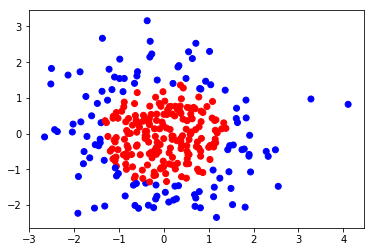

In [17]:
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.show()

In [18]:
def get_weight(shape,regularizer):
    w=tf.Variable(tf.random_normal(shape),dtype=tf.float32)
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

In [19]:
def get_bias(shape):
    b = tf.Variable(tf.constant(0.01,shape=shape))
    return b 

In [20]:
x= tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

In [21]:
w1=get_weight([2,11],0.01)
b1=get_bias([11])
y1=tf.nn.relu(tf.matmul(x,w1)+b1)

Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [22]:
w2 = get_weight([11,1],0.01)
b2=get_bias([1])
y=tf.matmul(y1,w2)+b2  #输出层不过激活

In [23]:
loss_mse=tf.reduce_mean(tf.square(y-y_))
loss_total=loss_mse+tf.add_n(tf.get_collection('losses'))

### 定义反向传播方向

In [24]:
train_step=tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

In [26]:
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    STEPS=40000
    for i in range(STEPS):
        start= (i*BATCH_SIZE)%len(X)
        end=start+BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
        if i%2000==0:
            loss_mse_v=sess.run(loss_mse,feed_dict={x:X,y_:Y_})
            print("After %d steps, loss is: %f"%(i,loss_mse_v))
    
    xx,yy=np.mgrid[-3:3:.01,-3:3:.01]
    grid = np.c_[xx.ravel(),yy.ravel()]
    probs=sess.run(y,feed_dict={x:grid})
    
    probs=probs.reshape(xx.shape)
    
    print("w1:\n",sess.run(w1))
    print("b1:\n",sess.run(b1))
    print("w2:\n",sess.run(w2))
    

After 0 steps, loss is: 8.299703
After 2000 steps, loss is: 1.346474
After 4000 steps, loss is: 0.200822
After 6000 steps, loss is: 0.100657
After 8000 steps, loss is: 0.088731
After 10000 steps, loss is: 0.085251
After 12000 steps, loss is: 0.082765
After 14000 steps, loss is: 0.080659
After 16000 steps, loss is: 0.079169
After 18000 steps, loss is: 0.077329
After 20000 steps, loss is: 0.076247
After 22000 steps, loss is: 0.075808
After 24000 steps, loss is: 0.075581
After 26000 steps, loss is: 0.074935
After 28000 steps, loss is: 0.073812
After 30000 steps, loss is: 0.073034
After 32000 steps, loss is: 0.072223
After 34000 steps, loss is: 0.071647
After 36000 steps, loss is: 0.071134
After 38000 steps, loss is: 0.070712
w1:
 [[-1.628195   -0.36334488 -0.9622512  -1.5380152   1.5469627   1.650173
  -0.3645977   0.75218904  1.0327247   0.78715175 -1.6675276 ]
 [ 1.4471556  -0.4894456  -0.26135534 -0.03737247  0.2705308   0.60299915
  -0.02858213 -0.3343117  -0.16891164  0.15364368 -0.6

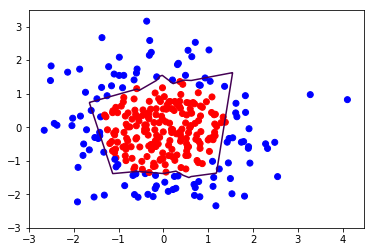

In [27]:
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.contour(xx,yy,probs,levels=[.5])
plt.show()

### 包含正则化

In [28]:
train_step=tf.train.AdamOptimizer(0.0001).minimize(loss_total)

In [29]:
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    STEPS=40000
    for i in range(STEPS):
        start= (i*BATCH_SIZE)%len(X)
        end=start+BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
        if i%2000==0:
            loss_mse_v=sess.run(loss_mse,feed_dict={x:X,y_:Y_})
            print("After %d steps, loss is: %f"%(i,loss_mse_v))
    
    xx,yy=np.mgrid[-3:3:.01,-3:3:.01]
    grid = np.c_[xx.ravel(),yy.ravel()]
    probs=sess.run(y,feed_dict={x:grid})
    
    probs=probs.reshape(xx.shape)
    
    print("w1:\n",sess.run(w1))
    print("b1:\n",sess.run(b1))
    print("w2:\n",sess.run(w2))
    

After 0 steps, loss is: 1.406029
After 2000 steps, loss is: 0.343594
After 4000 steps, loss is: 0.141002
After 6000 steps, loss is: 0.101096
After 8000 steps, loss is: 0.088173
After 10000 steps, loss is: 0.081531
After 12000 steps, loss is: 0.078123
After 14000 steps, loss is: 0.076183
After 16000 steps, loss is: 0.074993
After 18000 steps, loss is: 0.073932
After 20000 steps, loss is: 0.073258
After 22000 steps, loss is: 0.072768
After 24000 steps, loss is: 0.072474
After 26000 steps, loss is: 0.072093
After 28000 steps, loss is: 0.071801
After 30000 steps, loss is: 0.071669
After 32000 steps, loss is: 0.071618
After 34000 steps, loss is: 0.071384
After 36000 steps, loss is: 0.070666
After 38000 steps, loss is: 0.070219
w1:
 [[-0.33524662 -0.518086   -0.17300595  0.20647985  0.77597624  0.32485685
  -0.1896011  -0.2811593  -0.18134357 -0.4293992   0.27808604]
 [ 0.10268603  0.32820863 -0.03911873 -0.26469213  0.23398675 -0.9021797
  -0.05068247 -0.05840789 -0.04847926 -0.554884   -0.

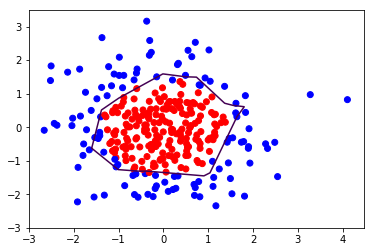

In [30]:
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.contour(xx,yy,probs,levels=[.5])
plt.show()